# <font color = LightGreen > **CA model of water dynamics** </font>

Authors:
- H. Malash, 15179192
- S. Bhusal, 14724383
- L. Pahladsingh, 13846566
- T. Glansdorp, 12748587

In [2]:
from model import CA_rules, CA_grid
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random
from analysis import count_neighbours, calculate_attributes

## <font color = LightBlue > **Background Information** </font>

Our cellular automaton (CA) model simulating an aqueous solution consists of a grid, representing the surface of a torus. Each cell, denoted as '$\textit{i}$' is surrounded by four neighbors '$\textit{j}$ ', and there is an additional cell two positions beyond '$\textit{i}$ ', labeled as '$\textit{k}$ '. We interpret the cell indicated by 'j' as the von Neumann neighborhood, and the cell indicated by 'k' as the extended von Neumann neighborhood.

The state of each cell, represented by binary numbers, signifies its occupancy. There are three possible options for occupancy within the system:

- An empty cell is denoted by 0.
- A cell containing water is indicated by 1.
- A cell containing solute is indicated by 2.

In our model, two parameters influence the movement of molecules within the grid: the $\textbf{breaking probability}$ ($P_B$) and the $\textbf{joining probability}$ ($J$). The combination of these probabilities determines the behavior of cell movement.

The $\textbf{breaking probability}$ ($P_B$) represents the probability of a molecule in cell $\textit{i}$ breaking away from a molecule in cell $\textit{j}$ when only one $\textit{j}$ cell is occupied. We have defined three specific breaking probabilities:

- $P_B(W)$: Water-water breaking probability
- $P_B(L)$: Solute-solute breaking probability
- $P_B(WL)$: Water-solute breaking probability

The  $\textbf{joining probability}$ ($J$) quantifies the ratio between the likelihood of a molecule at $\textit{i}$  moving towards an occupied $\textit{k}$ cell when $\textit{j}$  is empty and the probability of the same molecule at $\textit{i}$  moving towards an empty $\textit{k}$  cell when $\textit{j}$  is unoccupied. 

 is a positive number, when ($J=1$), it indicated that a molecule at $\textit{i}$ has the same probability to move towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. So the state of cell $\textit{k}$ does not matter. 

The parameter ($J$) is a positive number. When $J=1$, it signifies that a molecule at $\textit{i}$ has an equal probability of moving towards an occupied $\textit{k}$ as when $\textit{k}$ is empty. In this case, the state of cell $\textit{k}$ does not influence the movement probability. As before we have three distinct joining probabilities: $J(W)$, $J(L)$ and $J(WL)$.

### <font> **Moving probability** </font> 
Combining $P_B$ and $J$, we obtaining the moving probability of a cell $p_m$: </br>
$p_m$ = sum of $p_m(d)$ over all possible $\textit{d}$ if the sum <1,
else 1 </br>

with

$p_m(d) = 1 / (1 + ((4-n)/(P_B^n) - 1) / J(d)) $ </br>
if n < 4 and $P_B$ > 0  </br>

$\textit{n}$ indicating the number of occupied $\textit{j}$ cells, there are $4-n$ directions for $\textit{i}$ to move. 

In the case where $J=1$, the moving probability ($p_m$) is equal to $P_B^n$. Given that all our research accepts this condition, we will focus on working with joint probabilities involving only $P_B$ to calculate the moving probability of a molecule.

$\textit{Information mainly based on}$: </br>
Kier, L. B., & Cheng, C. K. (1994). A Cellular Automata Model of an Aqueous Solution, Journal of Chemical Information and Computer Science.  34, 1334-1337


base model locale interacties vormen organized fixed state.

check if emergent property of model still happens(emergent property is formation of a steady state(fixed point/cluster forming))

water model
pbw range


water solute model
add solute cell without interactions (they are in the way)

pbw base value from water model

add:
pbl
pbwl
solute concentration

pbw & pbl leave out pbwl interactions



## <font color = LightBlue > ***Robustness of Emergent Behaviour*** </font>

### <font color = Pink > **Exp 1: Water-Only** </font>

### <font color = Pink > **Exp 2 : Inert Solute** </font>

### <font color = Pink > **Exp 3 : Varying $P_b(L)$** </font>

In [11]:
pbl_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 
results = []

runs = 5

all_results = {pbl: [] for pbl in pbl_values}

for pbl_value in pbl_values:
    
    pbl_results = []

    for run in range(runs):
        print(f"Running simulation with {pbl_value} pbw value.")
        ca_grid = CA_grid()
        ca_rules = CA_rules(ca_grid, pbw=0.4, pbl=pbl_value, pbl_parameter=True, pbwl_parameter=False)

        final_grid = ca_rules.generate_simulation(pbl=pbl_value, pbw=0.4)

        count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
        pbl_results.append(count)

    pbl_results = np.array(pbl_results)
    print(pbl_results)

    average_results = np.mean(pbl_results, axis=0)
    std_dev_results = np.std(pbl_results, axis=0)

    all_results[pbl_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbl_value, data in all_results.items():
    print(f"Pbw value: {pbl_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

Running simulation with 0 pbw value.
[3930]
Running simulation with 0.1 pbw value.
[3944]
Running simulation with 0.2 pbw value.
[3966]
Running simulation with 0.3 pbw value.
[4106]
Running simulation with 0.4 pbw value.
[3846]
Running simulation with 0.5 pbw value.
[4070]
Running simulation with 0.6 pbw value.
[3868]
Running simulation with 0.7 pbw value.
[3884]
Running simulation with 0.8 pbw value.
[4000]
Running simulation with 0.9 pbw value.
[3972]
Running simulation with 1 pbw value.
[3914]
Pbw value: 0
Average: 3930.0
Standard Deviation: 0.0

Pbw value: 0.1
Average: 3944.0
Standard Deviation: 0.0

Pbw value: 0.2
Average: 3966.0
Standard Deviation: 0.0

Pbw value: 0.3
Average: 4106.0
Standard Deviation: 0.0

Pbw value: 0.4
Average: 3846.0
Standard Deviation: 0.0

Pbw value: 0.5
Average: 4070.0
Standard Deviation: 0.0

Pbw value: 0.6
Average: 3868.0
Standard Deviation: 0.0

Pbw value: 0.7
Average: 3884.0
Standard Deviation: 0.0

Pbw value: 0.8
Average: 4000.0
Standard Deviation: 0

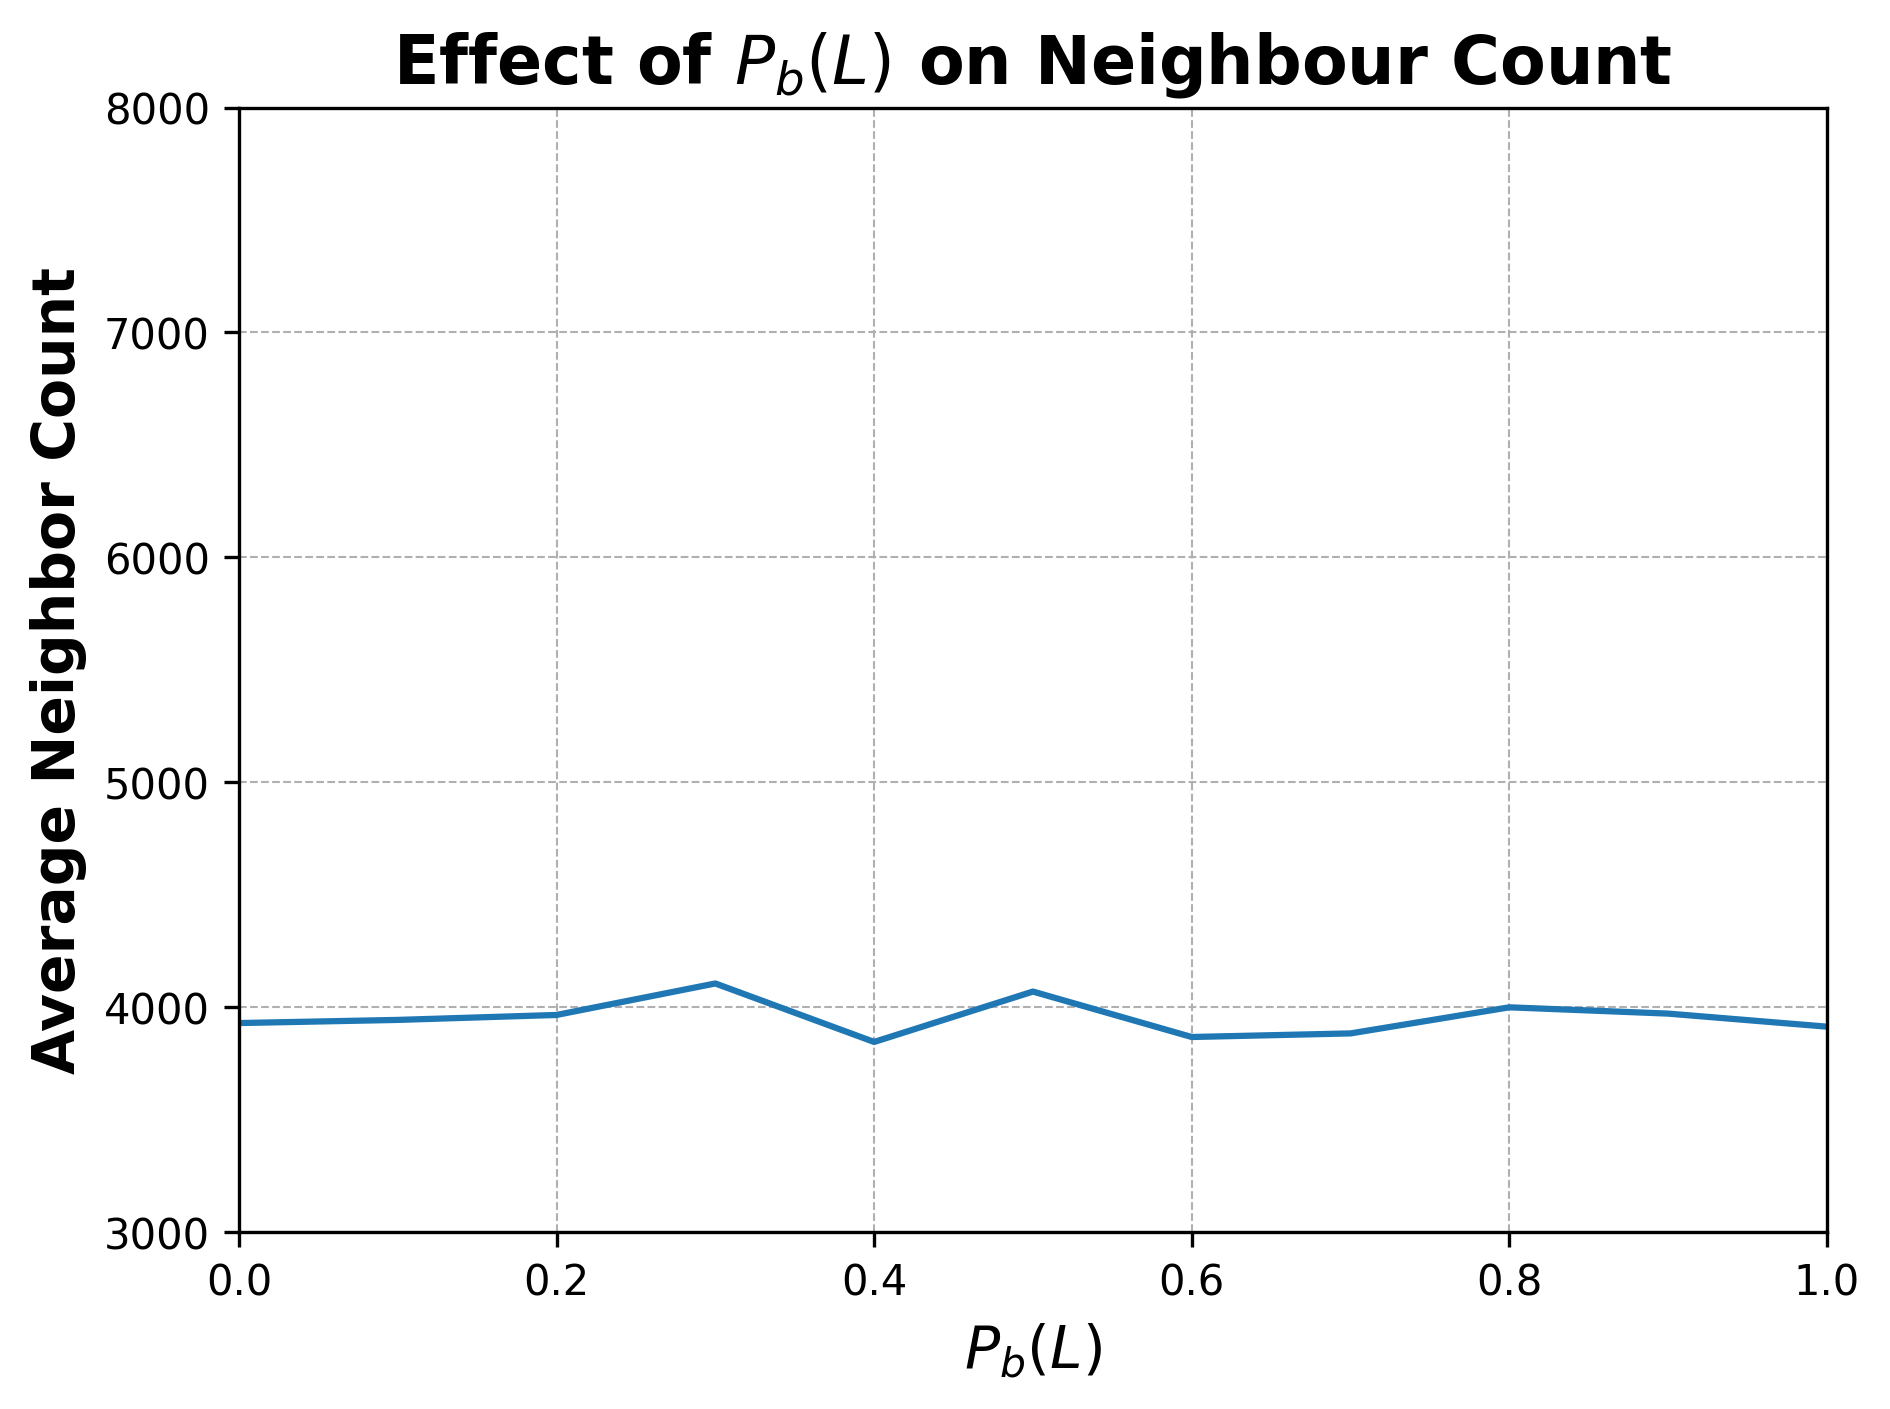

In [13]:
pbl_values_percent = [value for value in pbl_values]  # Convert to percentage

# Extract averages and standard deviations for plotting
averages = [all_results[pbw]['average'] for pbw in pbl_values]
std_devs = [all_results[pbw]['std_dev'] for pbw in pbl_values]

# Calculate confidence interval for error bars
num_runs = 1
confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)

# Calculate lower and upper bounds for the confidence interval
lower_bound = np.array(averages) - confidence_interval
upper_bound = np.array(averages) + confidence_interval

plt.figure(dpi=300)


# Plotting
plt.plot(pbl_values_percent, averages, label='Neighbor Count')
plt.fill_between(pbl_values_percent, lower_bound, upper_bound, alpha=0.2)

# Setting plot attributes
plt.xlabel('$P_b(L)$', fontsize=14, fontweight='bold')
plt.ylabel('Average Neighbor Count', fontsize=14, fontweight='bold')
plt.title('Effect of $P_b(L)$ on Neighbour Count', fontsize=16, fontweight='bold')
plt.xlim(0,1)
plt.ylim(3000, 8000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### <font color = Pink > **Exp 4 : Varying $P_b(WL)$** </font>

### <font color = Pink > **Exp 4 : Varying [S]** </font>

In [14]:
pbw_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  
solute_concentrations = [200, 800] 

results = []
runs = 1  

# Initialize dictionary to store results
all_results = {pbw: {solute: [] for solute in solute_concentrations} for pbw in pbw_values}

for pbw_value in pbw_values:
    for solute_concentration in solute_concentrations:
        pbw_results = []
        for run in range(runs):
            print(f"Running simulation with pbw value {pbw_value} and solute concentration {solute_concentration}.")
            ca_grid = CA_grid(solute_amount=solute_concentration)
            ca_rules = CA_rules(ca_grid, pbw=pbw_value, pbwl=0.0, pbl=0.0, pbwl_parameter=False, pbl_parameter=False) # change pbwl, pbw, pbl accordingly
            
            final_grid = ca_rules.generate_simulation()
            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbw_results.append(count)

        # Calculate statistics for each set of runs
        average_results = np.mean(pbw_results)
        std_dev_results = np.std(pbw_results)
        all_results[pbw_value][solute_concentration] = {
            'average': average_results,
            'std_dev': std_dev_results
        }

# Output the results
for pbw_value, solute_data in all_results.items():
    for solute_concentration, stats in solute_data.items():
        print(f"Pbw value: {pbw_value}, Solute concentration: {solute_concentration}")
        print(f"Average Neighbour Count: {stats['average']}")
        print(f"Standard Deviation: {stats['std_dev']}\n")


Running simulation with pbw value 0.1 and solute concentration 200.
Running simulation with pbw value 0.1 and solute concentration 800.
Running simulation with pbw value 0.2 and solute concentration 200.
Running simulation with pbw value 0.2 and solute concentration 800.
Running simulation with pbw value 0.3 and solute concentration 200.
Running simulation with pbw value 0.3 and solute concentration 800.
Running simulation with pbw value 0.4 and solute concentration 200.
Running simulation with pbw value 0.4 and solute concentration 800.
Running simulation with pbw value 0.5 and solute concentration 200.
Running simulation with pbw value 0.5 and solute concentration 800.
Running simulation with pbw value 0.6 and solute concentration 200.
Running simulation with pbw value 0.6 and solute concentration 800.
Running simulation with pbw value 0.7 and solute concentration 200.
Running simulation with pbw value 0.7 and solute concentration 800.
Running simulation with pbw value 0.8 and solute

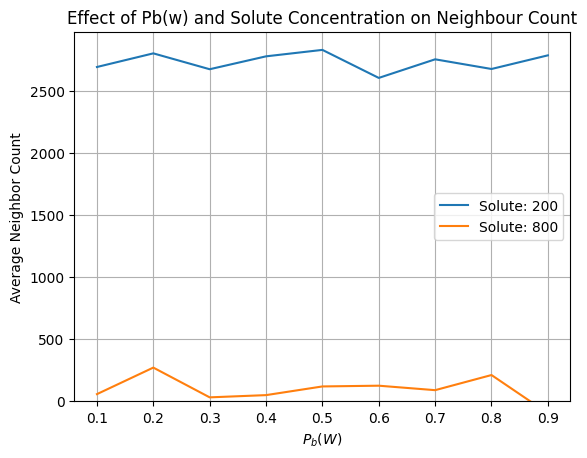

<Figure size 1920x1440 with 0 Axes>

In [23]:
# Plotting each solute concentration as a separate line with a confidence interval
for solute_concentration in solute_concentrations:
    averages = [all_results[pbw][solute_concentration]['average'] for pbw in pbw_values]
    std_devs = [all_results[pbw][solute_concentration]['std_dev'] for pbw in pbw_values]

    # Calculate confidence interval
    num_runs = runs
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    # Plot the average neighbor count
    plt.plot(pbw_values, averages, label=f'Solute: {solute_concentration}')
    plt.fill_between(pbw_values, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('$P_b(W)$')
plt.ylabel('Average Neighbor Count')
plt.title('Effect of Pb(w) and Solute Concentration on Neighbour Count')
plt.legend()
plt.grid(True)

# plt.xlim(0, 100)
plt.ylim(bottom=0) 

plt.figure(dpi=300)

plt.show()

## <font color = LightBlue > ***Statistics*** </font>

In [3]:
import scipy.stats
from scipy import stats

pwb_nosol = [8048, 7652, 7536, 7876, 7696] # at pbw = 0.4
pwb_sol = [6642, 6580, 6474, 6804, 6274] # at pbw = 0.4

pbl = [6454, 6594, 6738, 6408, 6532]
pbwl = [6870, 6558, 6684, 6762, 6470]

t_stat, p_value = stats.ttest_ind(pwb_sol, pbwl)
print(f"pbwl: -statistic: {t_stat}, P-value: {p_value}")

t_stat, p_value = stats.ttest_ind(pwb_sol, pbl)
print(f"pbl: -statistic: {t_stat}, P-value: {p_value}")

pbwl: -statistic: -1.005833976622603, P-value: 0.34394553578302567
pbl: -statistic: 0.0909992260359192, P-value: 0.9297304645833258


## <font color = LightBlue > ***Initial Experiments: Replication of Research in Article*** </font>

### <font color = Pink > **Influence of Water temperature on solubility** </font>

### <font color = Pink > **Influence of Solute Concentration** </font>

In [2]:
solute_concentrations = [0, 50] #, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
results = []
for solute_amount in solute_concentrations:
    print(f"Running simulation with {solute_amount} solute molecules.")
    ca_grid = CA_grid(solute_amount=solute_amount)
    ca_rules = CA_rules(ca_grid)
    final_grid = ca_rules.generate_simulation()

    f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
    output = np.array([f_o, f_1, f_2, f_3, f_4])
    results.append(output)

results = np.array(results)
print(results)


Running simulation with 0 solute molecules.
Running simulation with 50 solute molecules.
[[0.     0.0165 0.1215 0.3635 0.4985]
 [0.0025 0.029  0.132  0.37   0.4415]]


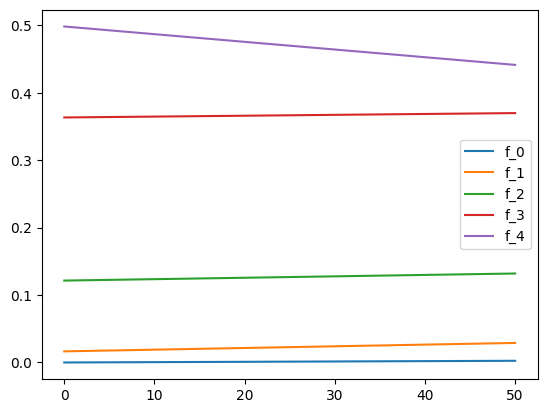

In [3]:

plt.plot(solute_concentrations, results.T[0], label='f_0')
plt.plot(solute_concentrations, results.T[1], label='f_1')
plt.plot(solute_concentrations, results.T[2], label='f_2')
plt.plot(solute_concentrations, results.T[3], label='f_3')
plt.plot(solute_concentrations, results.T[4], label='f_4')
plt.legend()
plt.show()

### <font color = Pink > **Influence of Water-Solute Breaking Probability** </font>

In [ ]:
pbw_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
results = []

runs = 5

all_results = {pbw: [] for pbw in pbw_values}
total_molecules = 2087 # 55x55x0.69

for pbw_value in pbw_values:
    
    pbw_results = []

    for run in range(runs):
        print(f"Running simulation with {pbw_value} pbw value.")
        ca_grid = CA_grid(solute_amount=0)
        ca_rules = CA_rules(ca_grid, pbw=pbw_value)

        final_grid = ca_rules.generate_simulation()

        f_o, f_1, f_2, f_3, f_4 = calculate_attributes(grid=ca_grid, rules=ca_rules)
        pbw_results.append(np.array([f_o, f_1, f_2, f_3, f_4]))

    pbw_results = np.array(pbw_results)

    average_results = np.mean(pbw_results, axis=0)
    std_dev_results = np.std(pbw_results, axis=0)

    all_results[pbw_value] = {
        'average': average_results,
        'std_dev': std_dev_results
    }

for pbw_value, data in all_results.items():
    print(f"Pbw value: {pbw_value}")
    print(f"Average: {data['average']}")
    print(f"Standard Deviation: {data['std_dev']}")
    print()

In [ ]:
for i, attribute in enumerate(['$f_0$', '$f_1$', '$f_2$', '$f_3$', '$f_4$']):
    averages = [all_results[pbw]['average'][i] for pbw in pbw_values]
    std_devs = [all_results[pbw]['std_dev'][i] for pbw in pbw_values]
    
    num_runs = 5
    confidence_interval = 1.96 * np.array(std_devs) / np.sqrt(num_runs)
    
    lower_bound = np.array(averages) - confidence_interval
    upper_bound = np.array(averages) + confidence_interval

    plt.plot(np.array(pbw_values), averages, label=attribute)
    plt.fill_between(np.array(pbw_values) / 2087 * 100, lower_bound, upper_bound, alpha=0.2)

    
plt.xlabel('Pbw value', fontsize=14, fontweight='bold')
plt.ylabel('Attribute Value', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Effect of Pbw values on Water Structure', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  